![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

### STAT 315 Final Project: Nicholas Johannessen, Saketh Marrapu, Alyssa Nugent, Iraam Rabbani


This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`


Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

## Defining the Questions

Our research addresses several significant issues concerning the complexities of sleep quality across various health and demographic domains. By utilizing sophisticapted vizualization methods, we investigate if particular occupational groups have poorer sleep quality, as well as explore whether different ages groups and BMI catergories are linked to quality of sleep. Moreover, the variety of vizualization methods we apply helps showcase how discrepencies in personal external factors are associated and to solidify the dynamic relationship between an individuall's quality of sleep and the presence or absence of certain sleep disorders.

## Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sleep_data = pd.read_csv('data.csv')
sleep_data
sleep_data_original = sleep_data.copy(deep=True)

This is a simulated dataset containing data on lifestyle and cardiovascular factors (listed above) of 400 fabricated individuals. Since this data is simulated and not surveyed from a real population, some results of this project may not coincide with popular beliefs or assumptions.

## Data Cleaning and Preparation

We are going to check if our data has any null values to see if we can use it in our analysis. We are also checking to make sure no data has been misinput. By checking the minimum and maximum values of each category, we can see if there are any unreasonable values, such as minimum values below 0, or a sleep duration greater than 24.

In [2]:
# Checking for null values
null_values_total = sleep_data.isnull().sum().sum()
print("Number of null values: ", null_values_total)

# Checking for out of bounds values with min and max values of numeric variables.
min_age = sleep_data['Age'].min()
print("Minimum age: ", min_age)
max_age = sleep_data['Age'].max()
print("Maximum age: ", max_age)
min_sleep_duration = sleep_data['Sleep Duration'].min()
print("Minimum sleep duration: ", min_sleep_duration)
max_sleep_duration = sleep_data['Sleep Duration'].max()
print("Maximum sleep duration: ", max_sleep_duration)
min_sleep_quality = sleep_data['Quality of Sleep'].min()
print("Minimum sleep quality: ", min_sleep_quality)
max_sleep_quality = sleep_data['Quality of Sleep'].max()
print("Maximum sleep quality: ", max_sleep_quality)
min_phys_activity = sleep_data['Physical Activity Level'].min()
print("Minimum physical activity level: ", min_phys_activity)
max_phys_activity = sleep_data['Physical Activity Level'].max()
print("Maximum physical activity level: ", max_phys_activity)
min_stress = sleep_data['Stress Level'].min()
print("Minimum stress level: ", min_stress)
max_stress = sleep_data['Stress Level'].max()
print("Maximum stress level: ", max_stress)
min_heart_rate = sleep_data['Heart Rate'].min()
print("Minimum heart rate: ", min_heart_rate)
max_heart_rate = sleep_data['Heart Rate'].max()
print("Maximum heart rate: ", max_heart_rate)
min_daily_steps = sleep_data['Daily Steps'].min()
print("Minimum daily steps: ", min_daily_steps)
max_daily_steps = sleep_data['Daily Steps'].max()
print("Maximum daily steps: ", max_daily_steps)

Number of null values:  219
Minimum age:  27
Maximum age:  59
Minimum sleep duration:  5.8
Maximum sleep duration:  8.5
Minimum sleep quality:  4
Maximum sleep quality:  9
Minimum physical activity level:  30
Maximum physical activity level:  90
Minimum stress level:  3
Maximum stress level:  8
Minimum heart rate:  65
Maximum heart rate:  86
Minimum daily steps:  3000
Maximum daily steps:  10000


There are no null values. 
Through examining the minimum and maximum values of our data, we can see that there are no values that are unreasonable, or outside the bounds of what would be possible.

# Preparing Data for Binary Classification

We are hoping to classify someone as having a disorder or not based on other traits they have. To do this, we need to encode the presence or absence of a sleep disorder with a binary variable. To do this we add in a column called Disorder Present. It is a binary variable used to designate if a person is suffering from a sleep disorder or not. 1 represents they have a disorder, 0 represents that they do not. We base this off the already built in column called Sleep Disorder, which is a string variable with options 'None', 'Sleep Apnea', or 'Insomnia'. If SLeep Disorder column has value 'None', we code in a 0 for Disorder Present. Otherwise, Disorder Present has value 1. We also create binary variables called Apnea and Insomnia that designate if a person is suffering from Apnea or Insomnia respectively. These columns are constructed in a similar manner.

In [3]:
# Adding in a binary column to denote if someone has any sleep disorder or not
# Creating a new column called disorder present, initialize all values to 1
sleep_data['Disorder Present'] = 1
# Throughout the sleep data dataframe, check if our Sleep Disorder column has value "None"
for i in range(len(sleep_data)):
    if sleep_data.loc[i, 'Sleep Disorder'] != 'Sleep Apnea' and sleep_data.loc[i, 'Sleep Disorder'] != 'Insomnia':
        #Since no sleep disorder is present, we set the corresponding row value of Disorder Present to 0.
        sleep_data.loc[i, 'Disorder Present'] = 0
# Creating a new column called Insomnia, a binary variable to designate if someone has Insomnia or not
# Initialize all values to 0
sleep_data['Insomnia'] = 0
for i in range(len(sleep_data)):
    # Check if the Sleep Disorder column has value 'Insomnia'
    if sleep_data.loc[i, 'Sleep Disorder'] == 'Insomnia':
        # If the column has value 'Insomnia', set the corresponding row value of Insomnia to 1
        sleep_data.loc[i, 'Insomnia'] = 1

# Creating a new column called Sleep Apnea, a binary variable to designate if someone has Sleep Apnea or not
# Initialize all values to 0
sleep_data['Apnea'] = 0
for i in range(len(sleep_data)):
    # Check if the Sleep Disorder column has value 'Sleep Apnea'
    if sleep_data.loc[i, 'Sleep Disorder'] == 'Sleep Apnea':
        # If the column has value 'Insomnia', set the corresponding row value of Insomnia to 1
        sleep_data.loc[i, 'Apnea'] = 1
        
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Disorder Present,Insomnia,Apnea
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,0,0,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,0,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,0,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,0,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,0,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1,0,1


# Splitting Data

We create four dataframes that split our original data based on the sleep disorder or lack thereof that someone is suffering from. Thus, we have separate dataframes that contain all the data for each category of Sleep disorder, and a fourth dataframe that contains data for anyone with a sleep disorder, whether it is sleep apnea or insomnia. This will make working with only data for people from a certain category much easier, as well as examining data for people with and without sleep disorders.


In [4]:
insomnia_data = sleep_data[sleep_data['Sleep Disorder'] == 'Insomnia']
no_disorder_data = sleep_data[sleep_data['Sleep Disorder'] == 'None']
sleep_apnea_data = sleep_data[sleep_data['Sleep Disorder'] == 'Sleep Apnea']
disorder_data = sleep_data[sleep_data['Disorder Present'] == 1]

# Can we predict if a person has a sleep disorder based on cardiovascular and lifestyle factors?

## Taking a look at data for people with sleep disorders and people without sleep disorders

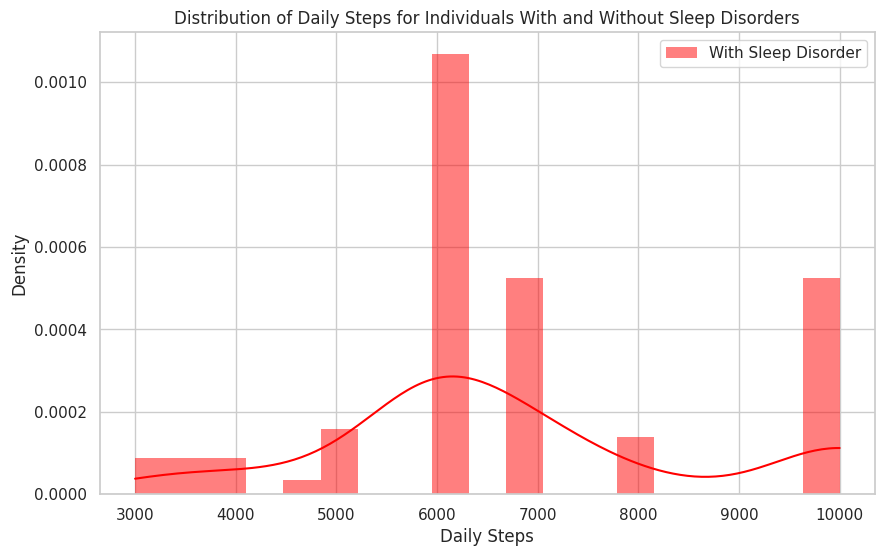

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")

# Plotting the distribution of daily steps for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(disorder_data['Daily Steps'], color="red", label='With Sleep Disorder', kde=True, stat="density", linewidth=0)
sns.histplot(no_disorder_data['Daily Steps'], color="blue", label='Without Sleep Disorder', kde=True, stat="density", linewidth=0)

plt.title('Distribution of Daily Steps for Individuals With and Without Sleep Disorders')
plt.xlabel('Daily Steps')
plt.ylabel('Density')
plt.legend()
plt.show()

## Creating a machine learning model to determine if someone has a disorder or not


/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

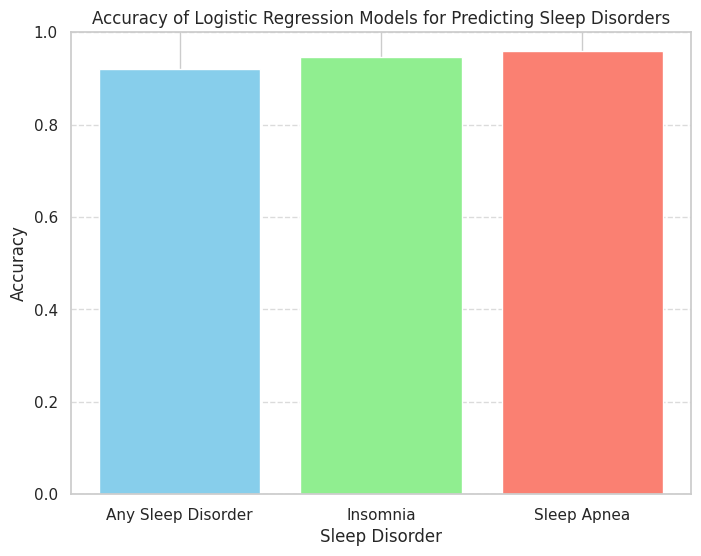

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sleep_data['Encoded Occ'] = label_encoder.fit_transform(sleep_data['Occupation'])

sleep_data['Encoded Gender'] = label_encoder.fit_transform(sleep_data['Gender'])

sleep_data['Encoded BMI'] = label_encoder.fit_transform(sleep_data['BMI Category'])

parts = sleep_data['Blood Pressure'].str.split('/')
systolic_pressure = []
diastolic_pressure = []

for part in parts:  # Corrected the loop iteration
    systolic_pressure.append(float(part[0]))  # Changed to append instead of assigning to index
    diastolic_pressure.append(float(part[1]))  # Changed to append instead of assigning to index
sleep_data["Diastolic Pressure"] = diastolic_pressure
sleep_data['Systolic Pressure'] = systolic_pressure
sleep_data['Pulse Pressure'] = sleep_data['Systolic Pressure'] - sleep_data["Diastolic Pressure"]

X = sleep_data[['Encoded Gender', 'Age', 'Encoded Occ', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Encoded BMI', 'Pulse Pressure', 'Heart Rate', 'Daily Steps']]
y = sleep_data['Disorder Present']
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy_any = accuracy_score(y_test, y_pred_test)


y = sleep_data['Insomnia']
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy_insomnia = accuracy_score(y_test, y_pred_test)


y = sleep_data['Apnea']
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy_apnea = accuracy_score(y_test, y_pred_test)


# Plot
import matplotlib.pyplot as plt

# Accuracy scores for predicting any sleep disorder, insomnia, and sleep apnea
accuracy_scores = [accuracy_any, accuracy_insomnia, accuracy_apnea]
disorder_labels = ['Any Sleep Disorder', 'Insomnia', 'Sleep Apnea']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(disorder_labels, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Sleep Disorder')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Models for Predicting Sleep Disorders')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above bar graph shows the accuracy of the logistic regression model determining the presence of sleep disorders. Predicting the presence of any sleep disorder has a 92% accuracy, more specifically, insomnia is 93%, and sleep apnea is 96%. I chose to use a bar graph because the simple graph was appropriate to show the discrepencies between this simple set of data.

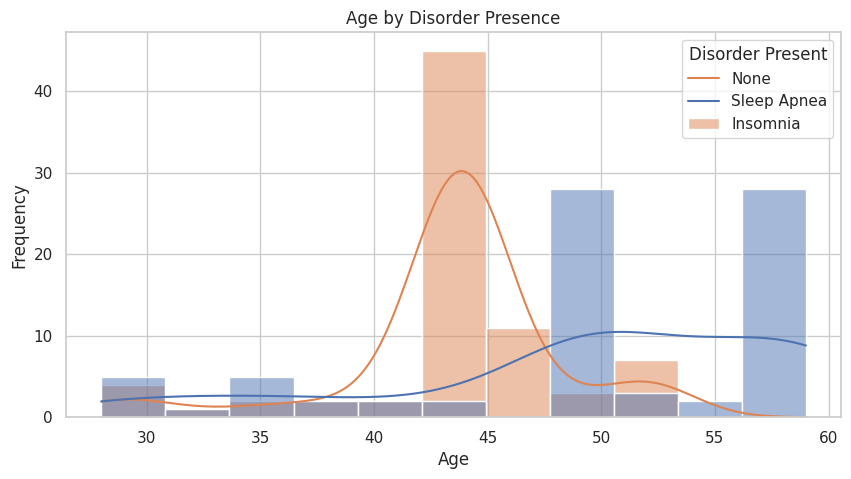

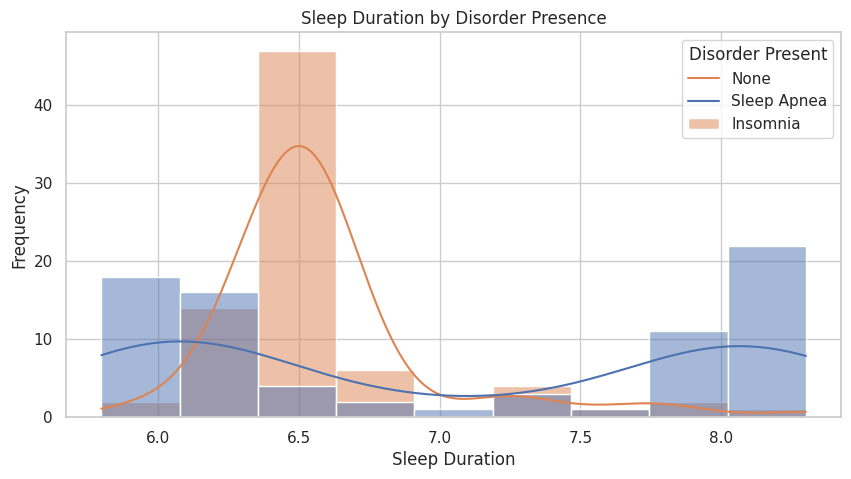

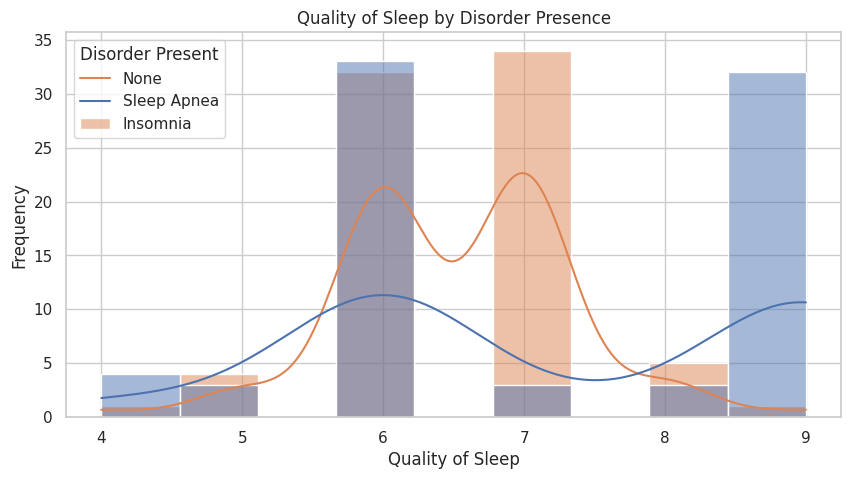

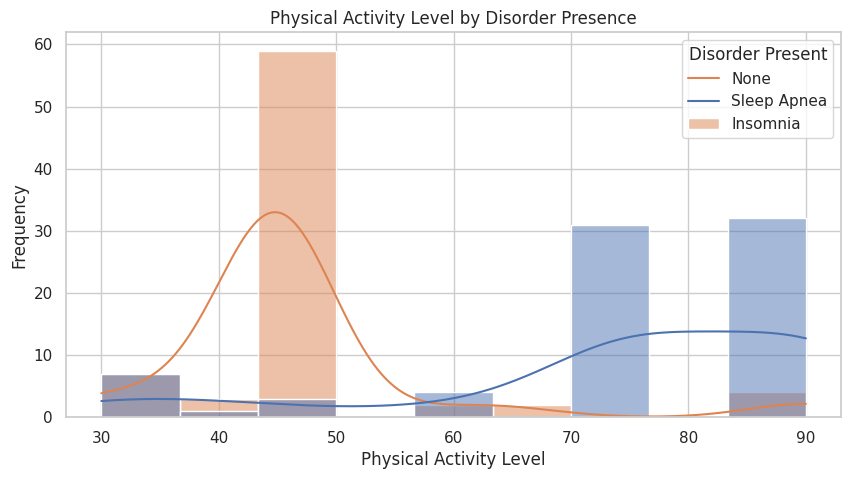

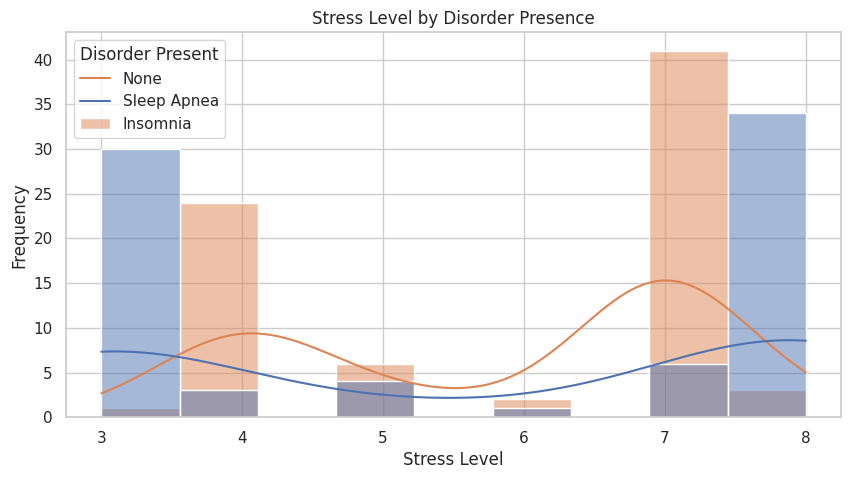

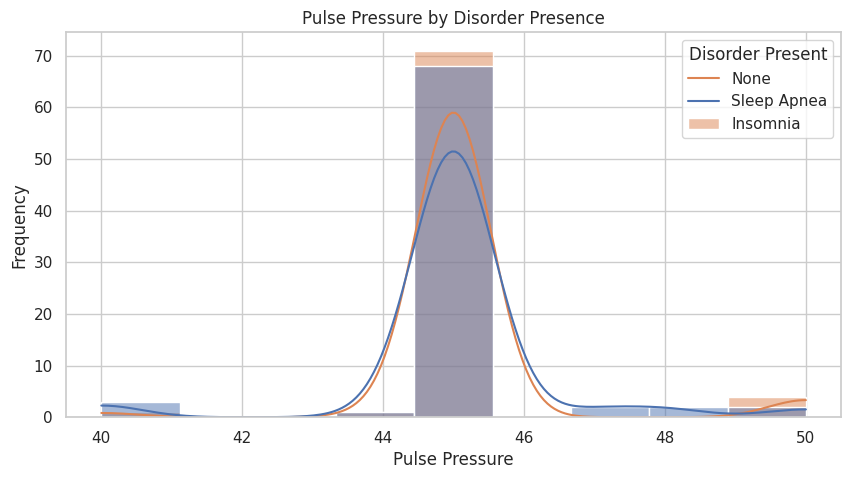

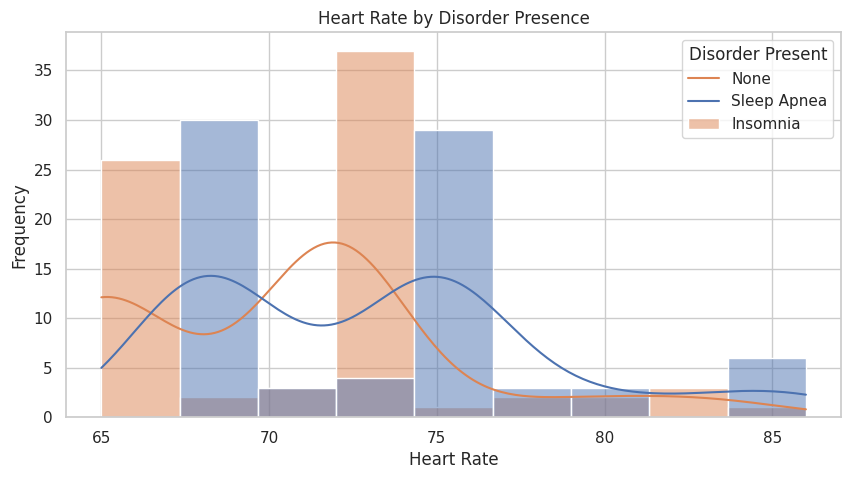

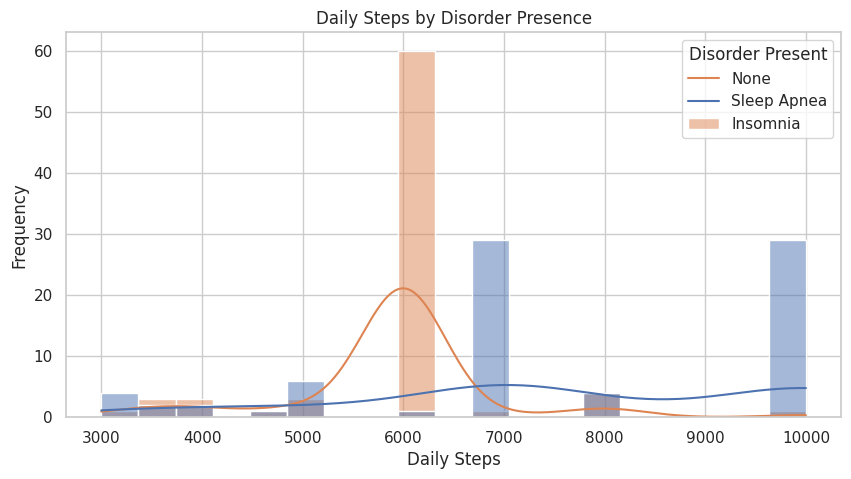

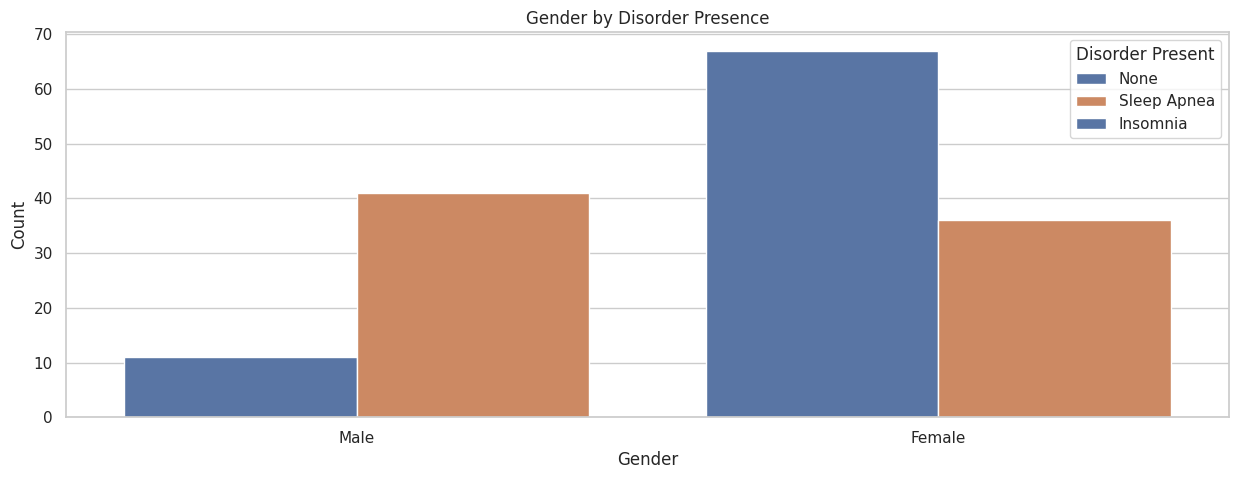

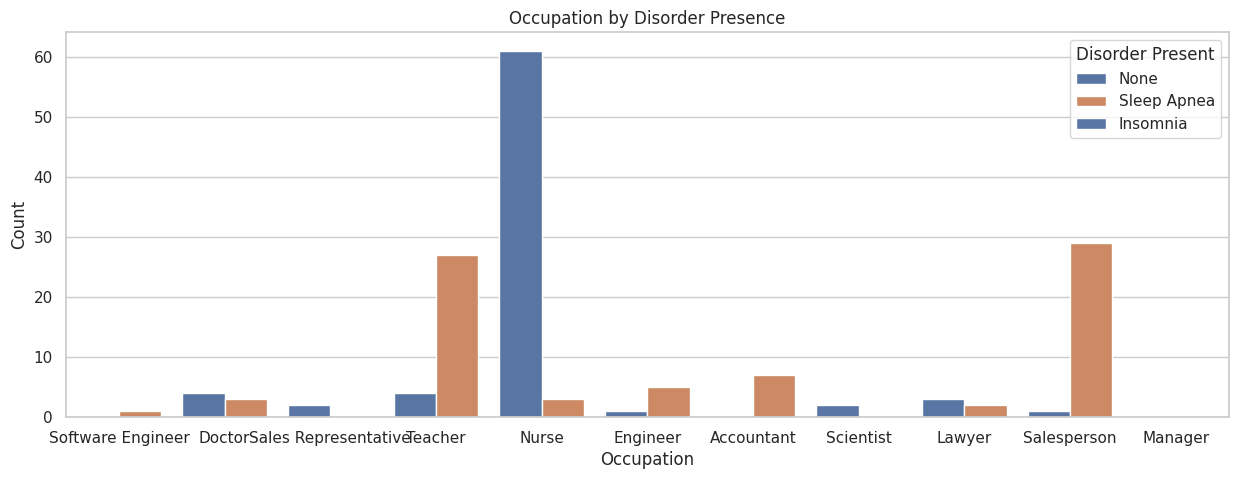

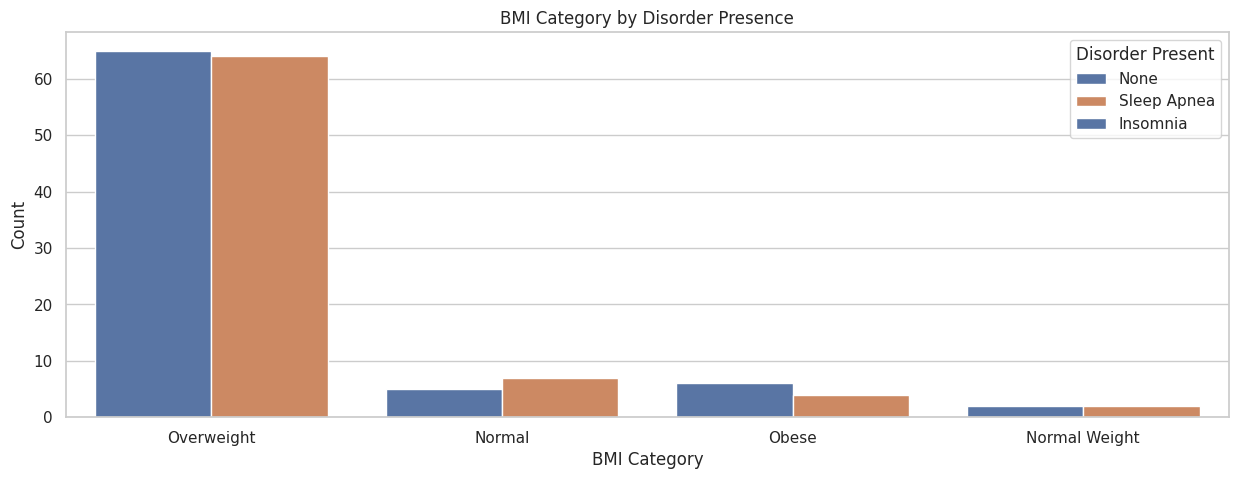

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Pulse Pressure', 'Heart Rate', 'Daily Steps']

# Plot numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=sleep_data, x=feature, hue='Sleep Disorder', kde=True)
    plt.title(f'{feature} by Disorder Presence')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Disorder Present', labels=['None', 'Sleep Apnea', 'Insomnia'])
    plt.show()
    
# Categorical features
categorical_features = ['Gender', 'Occupation', 'BMI Category']

# Plot categorical features
for feature in categorical_features:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=sleep_data, x=feature, hue='Sleep Disorder')
    plt.title(f'{feature} by Disorder Presence')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Disorder Present', labels=['None', 'Sleep Apnea', 'Insomnia'])
    plt.show()

To look into the complex relationship between the presence of sleeping disorders and the selected features, I have created a set of 11 graphs for extensive analysis. The first eight visualizations take a more subtle approach, using histograms that were specifically selected for their ability to convert numerical data into comprehensible frequency distributions. This selection provides vital insights into the interactions between each aspect by highlighting subtle patterns in the incidence of disorders across all features. The final three graphs utilize the strength of count plots to examine disorder prevalence via a categorical lens. 

Looking at these graphs we can make numerous observations about certain features and their apparent associations to sleep disorders. From the first graph, we can see insomnia is more frequently prevalent in adults less than 50 years old, whereas the frequency of sleep apnea increases with age. The second graph shows that insomniacs generally have higher sleep duration, possibly because of medication since insomnia as a disorder entails difficulty sleeping. Sleep apnea patients understandably have low frequency of all sleep durations, possibly due to the unpredictable awakenings throughout the night. The third graph also agrees with the previous. Interestingly enough, the fourth graph shows us that individuals with sleeping disorders generally have a higher frequency of physical activity. TO BE CONTINUED

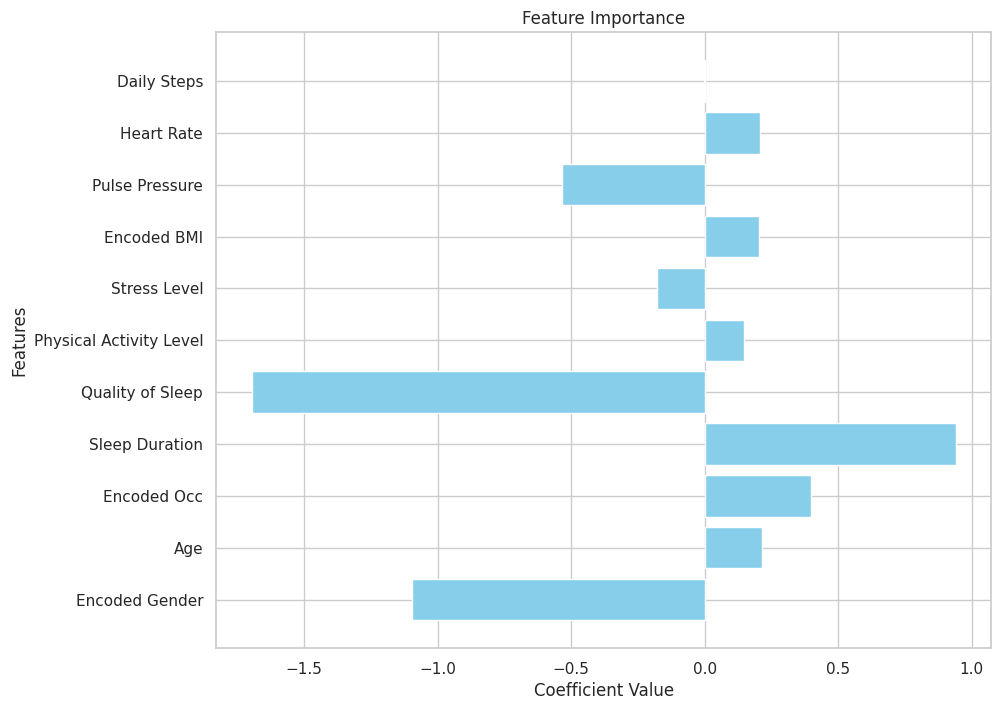

In [8]:
import matplotlib.pyplot as plt

# Find correlation cooefficients for each feature
coefficients = model.coef_
coefficients = coefficients[0].tolist()
feature_names = X_train.columns.tolist()
feature_coefficients = zip(feature_names, coefficients)

# Filter out 'Disorder Present' from feature names and its corresponding coefficient
filtered_feature_names = [name for name in X_train.columns if name != "Disorder Present"]
filtered_coefficients = [coef for name, coef in zip(X_train.columns, model.coef_[0]) if name != "Disorder Present"]

# Plotting the feature importance 
plt.figure(figsize=(10, 8))
plt.barh(filtered_feature_names, filtered_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


# Can we predict a person's occupation based on their quality of sleep, duration of sleep, stress levels, etc.?

## Exploratory Data Analysis

/tmp/ipykernel_677/2588605581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Sleep Duration', data=filtered_sleep_data, palette='Pastel1', order=ordered_occupations)


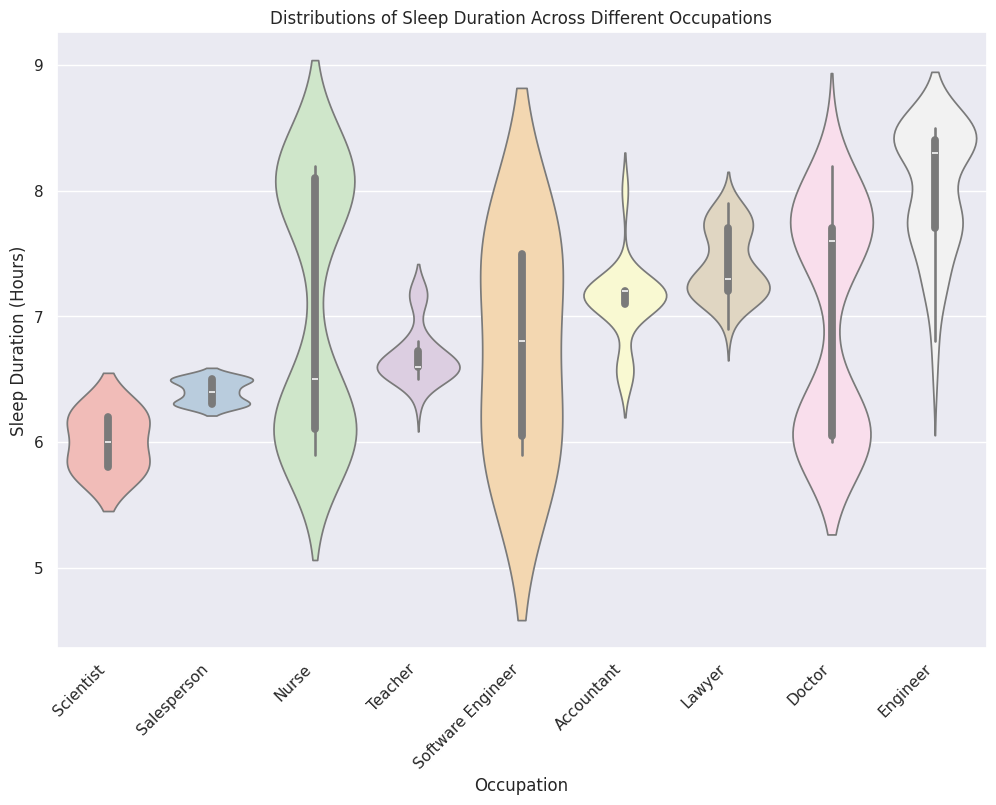

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'manager' and 'sales representative' from the dataset (there aren't enough data points for these occupations)
excluded_occupations = ['Manager', 'Sales Representative']
filtered_sleep_data = sleep_data[~sleep_data['Occupation'].isin(excluded_occupations)]

# Sort occupations by median sleep duration
ordered_occupations = filtered_sleep_data.groupby('Occupation')['Sleep Duration'].median().sort_values().index

sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Occupation', y='Sleep Duration', data=filtered_sleep_data, palette='Pastel1', order=ordered_occupations)
plt.title('Distributions of Sleep Duration Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (Hours)')
plt.xticks(rotation=45, ha='right')
plt.show()

I created a violin plot to analyze the distributions of sleep duration across the different occupations. Violin plots include a box plot, which lets us recognize sumamry statistics such as maximum, minimum, IQR, and median. These plots also include the pdf of the data (probability density funciton), which allows us to recognize the distibutions. From this plot we can discern that scientists have the shortest avergae sleep duration and engineers have the longest average sleep duration. Nurses, software engineers, and doctors have the widest range of sleep durations with nurses and doctors having bimodal data sets. This is an indication that nurses and doctors might have 2 subpopulations, the subpopulations also look to resemble each other (one centered around 6 hours, and another centered around 8 hours).Software engineers have a more uniform data set and accountants look to have a fairly normal data set of sleep duration.

Manager and sales representative were excluded from the analysis as there are not enough observations for these occupations for a meaningful analysis to be made.

/tmp/ipykernel_677/1382236515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Quality of Sleep', data=filtered_sleep_data, palette='Pastel1', order = ordered_occ)


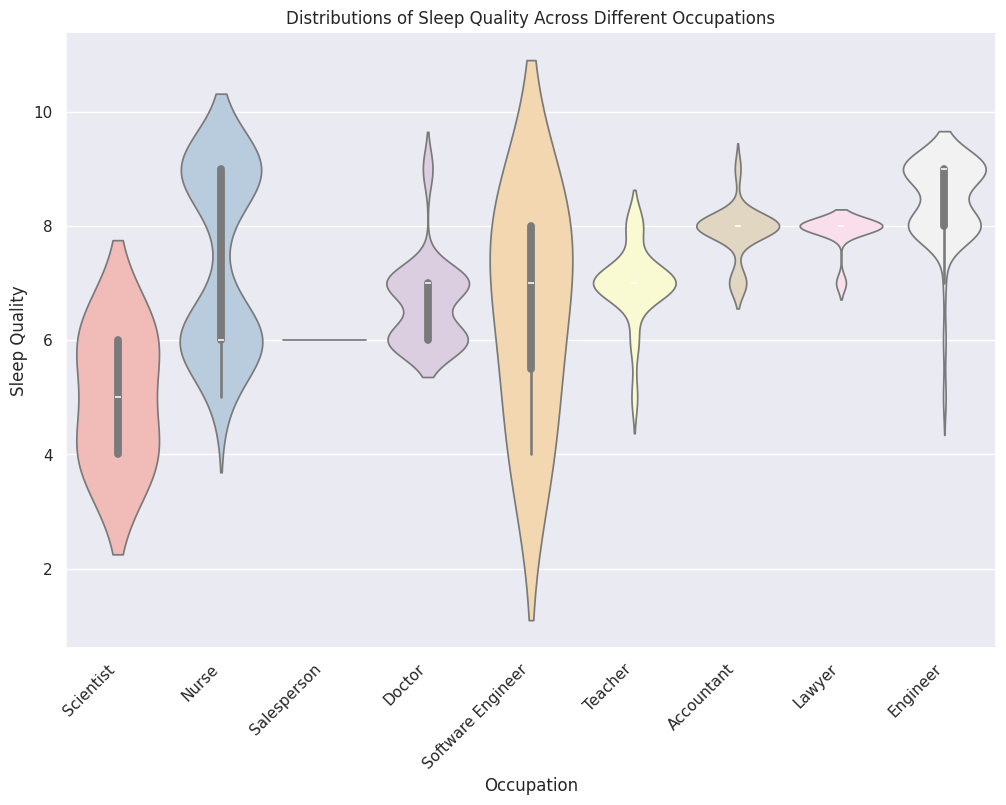

In [10]:
# Violin plot of the distributions of sleep quality across different occupations

# Sort occupations by median quality of sleep 
ordered_occ = filtered_sleep_data.groupby('Occupation')['Quality of Sleep'].median().sort_values().index

sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Occupation', y='Quality of Sleep', data=filtered_sleep_data, palette='Pastel1', order = ordered_occ)
plt.title('Distributions of Sleep Quality Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45, ha='right')
plt.show()

We used another violin plot to show the difference in distributions between sleep quality across different occupations. Scientists and engineers again have the lowest and highest medians. Scientists have a uniform distribution, nurses have a bimodal distribution, and accountants and lawyers have fairly normal distributions. From this plot we can also see that all salespeople reported a quality of sleep score of 6.

/tmp/ipykernel_677/4196359679.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Stress Level', data=filtered_sleep_data, palette='Pastel1', order = ordered_stress)


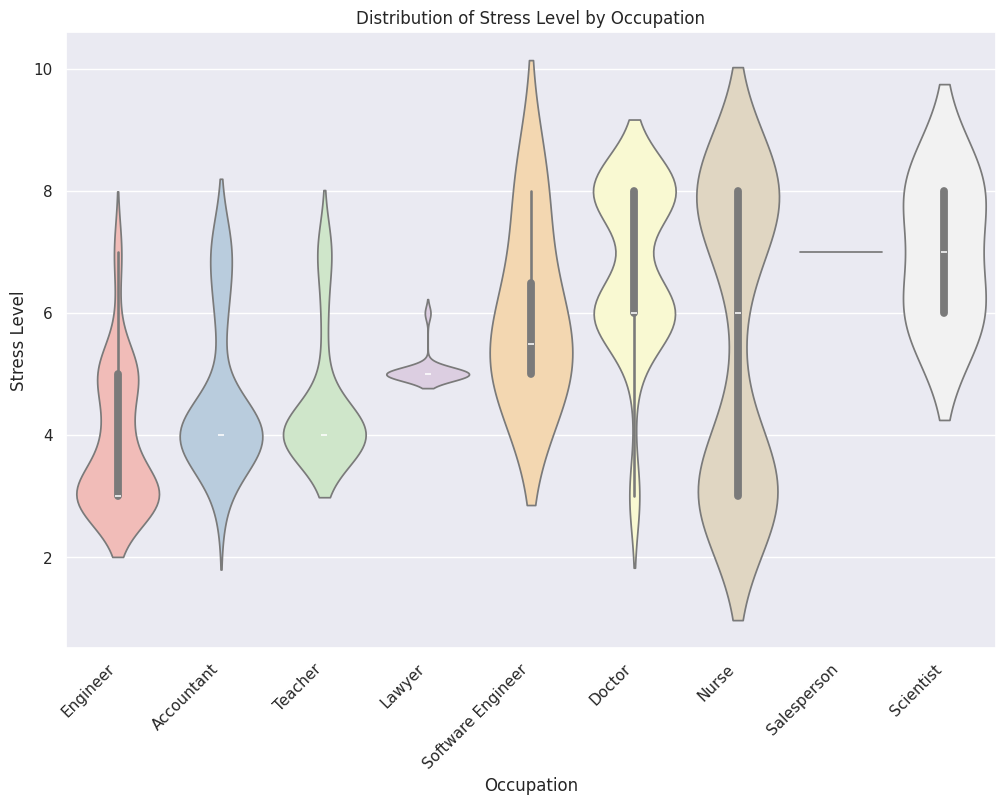

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

ordered_stress = filtered_sleep_data.groupby('Occupation')['Stress Level'].median().sort_values().index

plt.figure(figsize=(12, 8))
sns.violinplot(x='Occupation', y='Stress Level', data=filtered_sleep_data, palette='Pastel1', order = ordered_stress)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.show()

This violin plot looks at the relationship betwen occupation and stress level. Engineers have the lowest median stress level and scientists ahve the highest reported stress level, this is the opposite of what was found for sleep quality and sleep duration. It may be interesting to look at if stress levels and sleep quality/duration are negatively correlated. Accountants and teachers seem to have skewed normal distributions, both centered around a reported stress level of 4/10. Nurses and doctors have bimodal distributions again, again a possible indication of subpoopulations in the data. Nurses looking to have the widest spread of data. It also can be seen that all salespeople reported a stress level of 7/10.

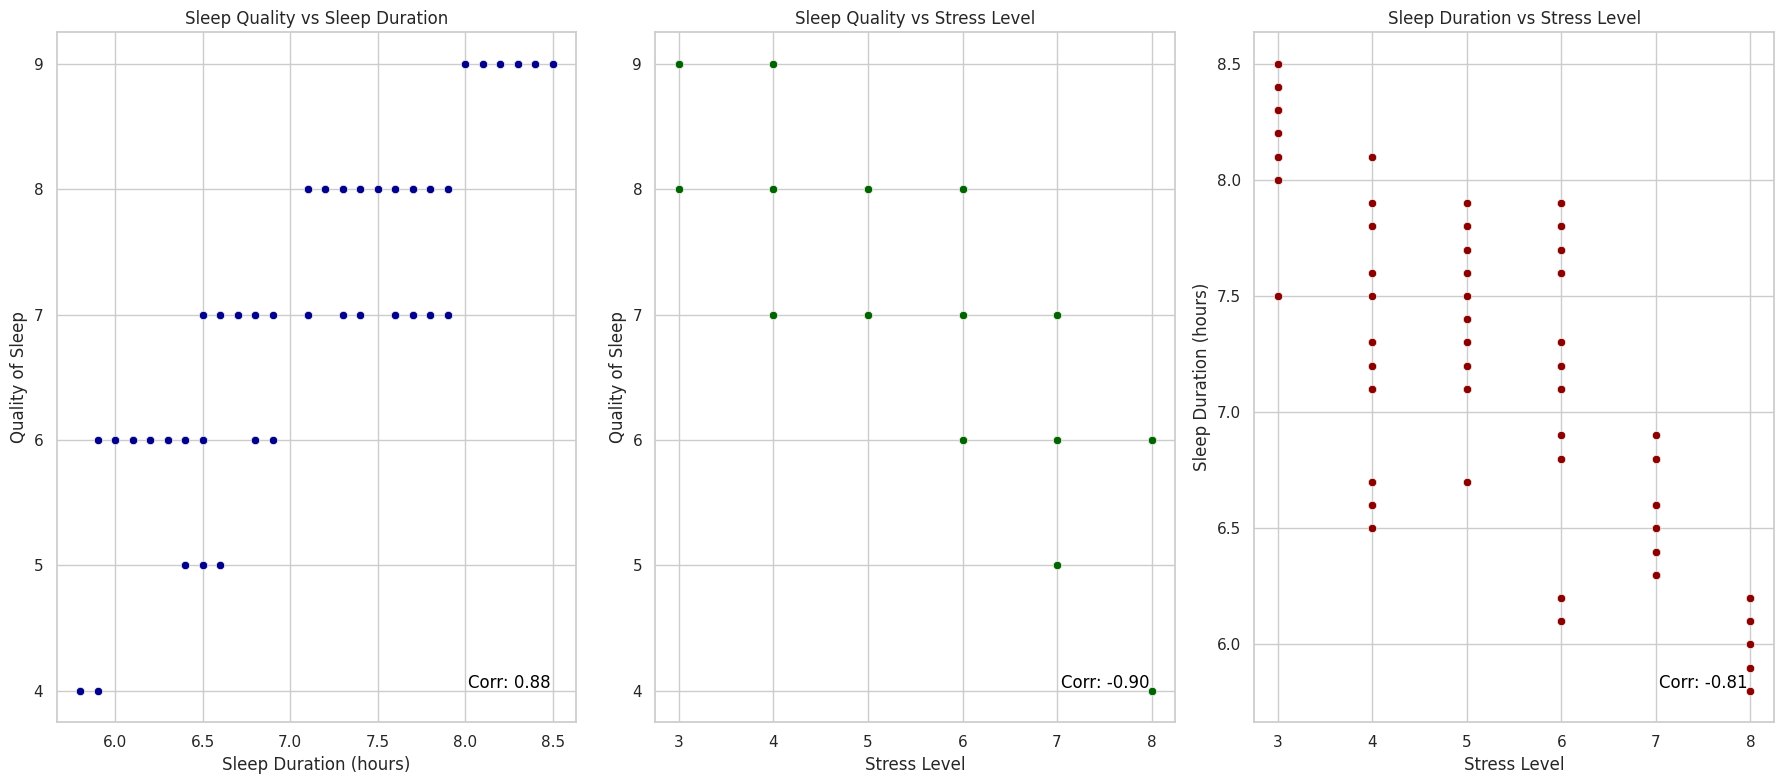

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# set the background to white (points weren't showing up very well on the dark grid)
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# correlation for Sleep Quality vs Sleep Duration
corr_quality_duration = np.corrcoef(filtered_sleep_data['Sleep Duration'], filtered_sleep_data['Quality of Sleep'])[0, 1]
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=filtered_sleep_data, ax=axs[0], color='darkblue')
axs[0].set_title('Sleep Quality vs Sleep Duration')
axs[0].set_xlabel('Sleep Duration (hours)')
axs[0].set_ylabel('Quality of Sleep')
axs[0].text(0.95, 0.05, f'Corr: {corr_quality_duration:.2f}', transform=axs[0].transAxes, horizontalalignment='right', color='black')

# correlation for Sleep Quality vs Stress Level
corr_quality_stress = np.corrcoef(filtered_sleep_data['Stress Level'], filtered_sleep_data['Quality of Sleep'])[0, 1]
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=filtered_sleep_data, ax=axs[1], color='darkgreen')
axs[1].set_title('Sleep Quality vs Stress Level')
axs[1].set_xlabel('Stress Level')
axs[1].set_ylabel('Quality of Sleep')
axs[1].text(0.95, 0.05, f'Corr: {corr_quality_stress:.2f}', transform=axs[1].transAxes, horizontalalignment='right', color='black')

# correlation for Sleep Duration vs Stress Level
corr_duration_stress = np.corrcoef(filtered_sleep_data['Stress Level'], filtered_sleep_data['Sleep Duration'])[0, 1]
sns.scatterplot(x='Stress Level', y='Sleep Duration', data=filtered_sleep_data, ax=axs[2], color='darkred')
axs[2].set_title('Sleep Duration vs Stress Level')
axs[2].set_xlabel('Stress Level')
axs[2].set_ylabel('Sleep Duration (hours)')
axs[2].text(0.95, 0.05, f'Corr: {corr_duration_stress:.2f}', transform=axs[2].transAxes, horizontalalignment='right', color='black')

plt.tight_layout()
plt.show()

These three scatter plots examine the relationships between Sleep Quality vs. Sleep Duration, Sleep Quality vs. Stress Level, and Sleep Duration vs. Stress Level. For the Sleep Quality vs. Sleep Duration the plot as well as a correlation coefficient of 0.88 indicates a strong positive correlation. The plot Sleep Quality vs. Stress Level and its correlation coefficient of -0.90 indicates a strong negative correlation. And the plot Sleep Duration vs. Stress Level and its correlation coefficient of -0.81 indicates a strong negative correlation. This means as sleep duration increases, quality of sleep is expected to deacrese; and as stress level increases, quality of sleep and sleep duration are expected to decrease. This confirms suspicious we had about these relationships from the violin plots.

In [13]:
# table of average stats by occupation
avg_stats_by_occupation = filtered_sleep_data.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Age': 'mean',
    'Stress Level': 'mean',
    'Pulse Pressure': 'mean',
    'Heart Rate': 'mean',
    'Physical Activity Level': 'mean',
    'Encoded BMI': 'mean',
    'Daily Steps': 'mean'
}).round(2).reset_index()

# Renaming columns for clarity
avg_stats_by_occupation.columns = ['Occupation', 'Average Sleep Duration', 'Average Quality of Sleep', 'Average Age', 'Average Stress Level', 'Average Pulse Pressure', 'Average Heart Rate', 'Average Physical Activity Level', 'Average BMI', 'Average Daily Steps']

# Displaying the table
avg_stats_by_occupation

,Occupation,Average Sleep Duration,Average Quality of Sleep,Average Age,Average Stress Level,Average Pulse Pressure,Average Heart Rate,Average Physical Activity Level,Average BMI,Average Daily Steps
0,Accountant,7.11,7.89,39.62,4.59,40.81,68.86,58.11,0.62,6881.08
1,Doctor,6.97,6.65,32.68,6.73,42.49,71.52,55.35,0.14,6808.45
2,Engineer,7.99,8.41,46.59,3.89,44.52,67.19,51.86,0.21,5980.95
3,Lawyer,7.41,7.89,39.43,5.06,44.96,69.64,70.43,0.23,7661.70
4,Nurse,7.06,7.37,51.79,5.55,44.79,72.00,78.59,2.81,8057.53
5,Salesperson,6.40,6.00,43.53,7.00,45.00,72.00,45.00,3.00,6000.00
6,Scientist,6.00,5.00,33.50,7.00,44.00,78.50,41.00,3.00,5350.00
7,Software Engineer,6.75,6.50,31.25,6.00,43.25,75.50,48.00,1.75,5800.00
8,Teacher,6.69,6.98,41.72,4.53,44.32,67.22,45.62,2.52,5957.50


The table above shows all average statistics across the occupations. Again, manager and sales representative were excluded from the analysis as there are not enough observations for these occupations for a meaningful analysis to be made.

## We will now create a machine learning model to predict a person's occupation

I chose to use a Random Forest to model the relationship between occupation and the features of this dataset. Random forests are a collection of decision trees, and decision trees are a type of machine learning model made to imitate human thinking which makes them easy to interpret. Decision trees make predictions based on answers to a specified set of questions. While decsion trees are good for multiclassification problems, such as predicting occupations based on certain features, they are prone to overfitting. We use a collection of decision trees, a random forest, becuase the predictions in these models will generalize to the data much better than a single 'tree'. 

/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 6, 'n_estimators': 100, 'random_state': 42}
Best F1 Weighted Score: 0.9277666576669311


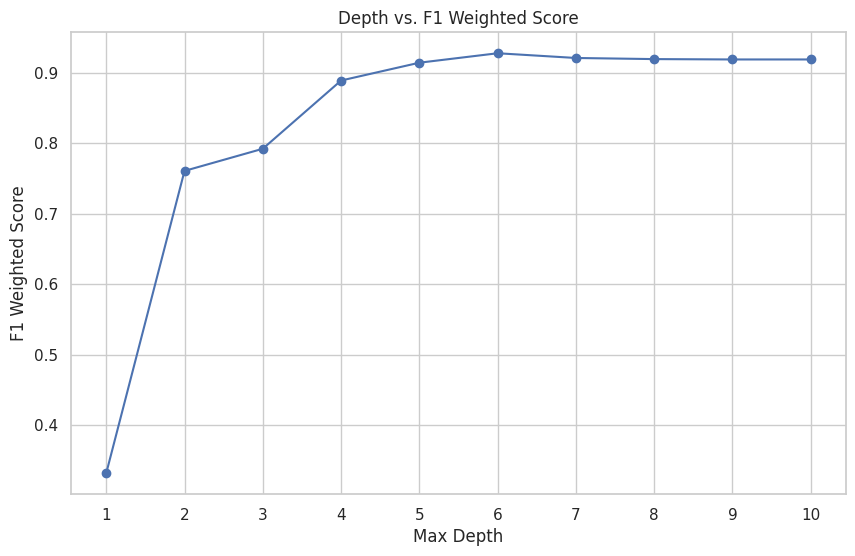

[0.33172471 0.76077904 0.79222651 0.88904982 0.91435027 0.92776666
 0.92105694 0.91946789 0.91895263 0.91895263]


In [14]:
#cross validation to select depth of tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# data prep
rf_X = sleep_data[['Encoded Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Encoded BMI', 'Pulse Pressure', 'Heart Rate', 'Daily Steps', 'Disorder Present']]
rf_y = sleep_data['Occupation']

# split into training and testing 
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# define the parameter grid
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],  
    'n_estimators': [100],  
    'random_state': [42]
}

# create Random Forest classifier
rf_model = RandomForestClassifier()

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(rf_X_train, rf_y_train) 

# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Weighted Score:", best_score)

depths = [params['max_depth'] for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# Plot the depths vs. scores
plt.figure(figsize=(10, 6))
plt.plot(depths, scores, marker='o')
plt.title('Depth vs. F1 Weighted Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Weighted Score')
plt.xticks(depths)
plt.grid(True)
plt.show()

print(grid_search.cv_results_['mean_test_score'])

The code above preforms hyperparameter tuning using grid search and cross validation to select the optimal depth of our random forest model. Hyperparameter tuning is the process of finding the best set of hypeparameters (external configuration settings that cannot be learned from the data) for a machine learning model. These parameters control aspects of the learnign process such as complexity, capacity, or optimization strategy. Maximum depth of a decision tree is an example of a hyperparameter. 

Grid search is a technique used for hyperparameter tuning that iterates through all combinations of hyperparameters defined in the parameter grid and selects the best combination based on the specified scoring metric ('f1_weighted') anc cross validation ('cv=5').

A cross validation of 5 means that the dataset is divided into 5 equal-sized folds. The model was trained 5 times, each time using 4 folds for training and 1 fold for validation. Cross validation helps to estimate the model's performance more accurately that a single train-test split by reducing the variability in performance metrics. 'f1_weighted' refers to the weighted average of F1 score for each occupation in the multi-class classification. F1 score is the harmonic mean of precision and recall, the weighted version takes into account class imbalances by computing the average weighted by the number of samples for each occupation. 

I split the data into training and testing sets using train_test_split from sklearn.model_selection. The testing set size is set to 20%, and a random state of 42 is fixed for reproducibility.

The plot above provides insights into how the performance of the random forest classifier changes with different depths. The mean test scores obtained during cross-validation for each depth were also printed. From this we can see that the model's performance imporves with increasing depth up to a depth of 6 and the starts to decline after that. Because of this, we will choose a maximum depth of 6 for our random forest model in order to maximise the F1 score on the validation set while avoiding overfitting. 

In [15]:
#refining model with max depth of 6 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data prep
rf_X = sleep_data[['Encoded Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Encoded BMI', 'Pulse Pressure', 'Heart Rate', 'Daily Steps', 'Disorder Present']]
rf_y = sleep_data['Occupation']

# split into training and testing 
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# train model with optimal max depth
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)  # setting max_depth to 6
rf_model.fit(rf_X_train, rf_y_train)  # train model on training data

# evaluate
rf_y_pred = rf_model.predict(rf_X_test)  # predicting using trained model
accuracy = accuracy_score(rf_y_test, rf_y_pred)
print('Accuracy: ', accuracy)
print('\nClassification Report: ')
print(classification_report(rf_y_test, rf_y_pred))
print('\nConfusion Matrix: ')
print(confusion_matrix(rf_y_test, rf_y_pred))

Accuracy:  0.92

Classification Report: 
                      precision    recall  f1-score   support

          Accountant       0.80      0.80      0.80         5
              Doctor       0.90      1.00      0.95        18
            Engineer       1.00      1.00      1.00        10
              Lawyer       1.00      0.82      0.90        11
               Nurse       1.00      1.00      1.00        12
Sales Representative       0.50      1.00      0.67         1
         Salesperson       1.00      1.00      1.00        10
   Software Engineer       0.00      0.00      0.00         2
             Teacher       0.71      0.83      0.77         6

            accuracy                           0.92        75
           macro avg       0.77      0.83      0.79        75
        weighted avg       0.91      0.92      0.91        75


Confusion Matrix: 
[[ 4  0  0  0  0  0  0  0  1]
 [ 0 18  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0]
 [ 0  2  0  9  0  0  0  0  0]
 [ 0  0  0

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In the code above, we have refined our random forest classifier model by setting the maximum depth of the decision tress to 6. We installed the random forest classifier with 'rf_model' this random forest has 100 trees. We then trained the model on the training data using the 'fit' method. The trained model was used to make predictions ('rf_y_pred') on the testing data. 

The accuracy of the model, classification report, and confusion matrix all provide insights into the model's performance (precision, recall, F1 score, and confusion between predicted and true labels). Precision is the probability that an observation classified as a 1 is actually a 1. Recall is the probability of an observation in class 1 actually being predicted as class 1. F1 score is the harmonic mean of precision and recall.

The model has an accuracy of 92% which is great! The classificaiton report indicates that the model preforms well for most classes, with high (and in some cases perfect) precision, recall, and F1 scores for several occupations. However, there are some classes with lower performance such as 'Sales Representative' and 'Software Engineer', this may be due to a small number of data points of these classifications in this test set.

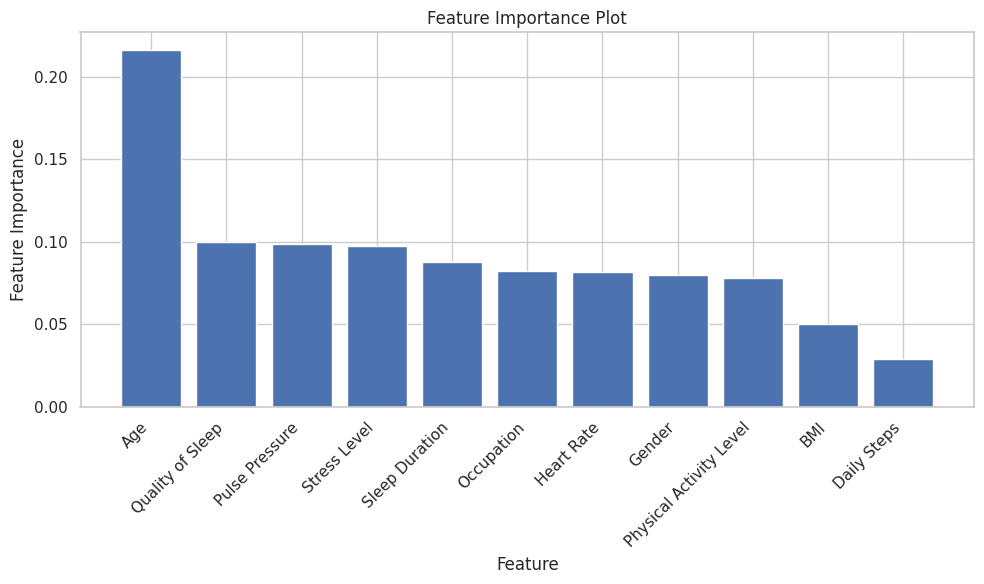

In [16]:
#feature importance plot ordered by decreasing importance

import numpy as np
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # sorting feature importances in descending order

# renaming features for better readability
features_renamed = X_train.columns[indices].to_series().replace({
    'Encoded Occ': 'Occupation',
    'Encoded Gender': 'Gender',
    'Encoded BMI': 'BMI'
})

plt.figure(figsize = (10,6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align = 'center') 
plt.xticks(range(X_train.shape[1]), features_renamed, rotation = 45, ha="right")  # rotate feature names for better readability and adjust alignment
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()  # adjusting layout to make room for the rotated x-axis labels
plt.show()

An importance score refers to the relative contribution of each feature (gender, age, sleep duration, quality of sleep, etc.) to the model's ability to predict the target variable, which in this case is occupation. In the sense of a Random Forest model, importance scores are found based on how much each feature decreases the impurity at each node of the decision trees in the forest. Gini Impurity is used in decision tree models to determine how the features should split nodes in order to form the trees. The Gini Impurity is a number 0-0.5, this indicates the likelihood of a randomly chosen element from the dataset would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

In other words, importance scores generated by the Random Forest model quantify the influence of each feature on predicting occupations based on sleep-related factors. From this plot we can see that age seems play a large role in determining a person's occupation.


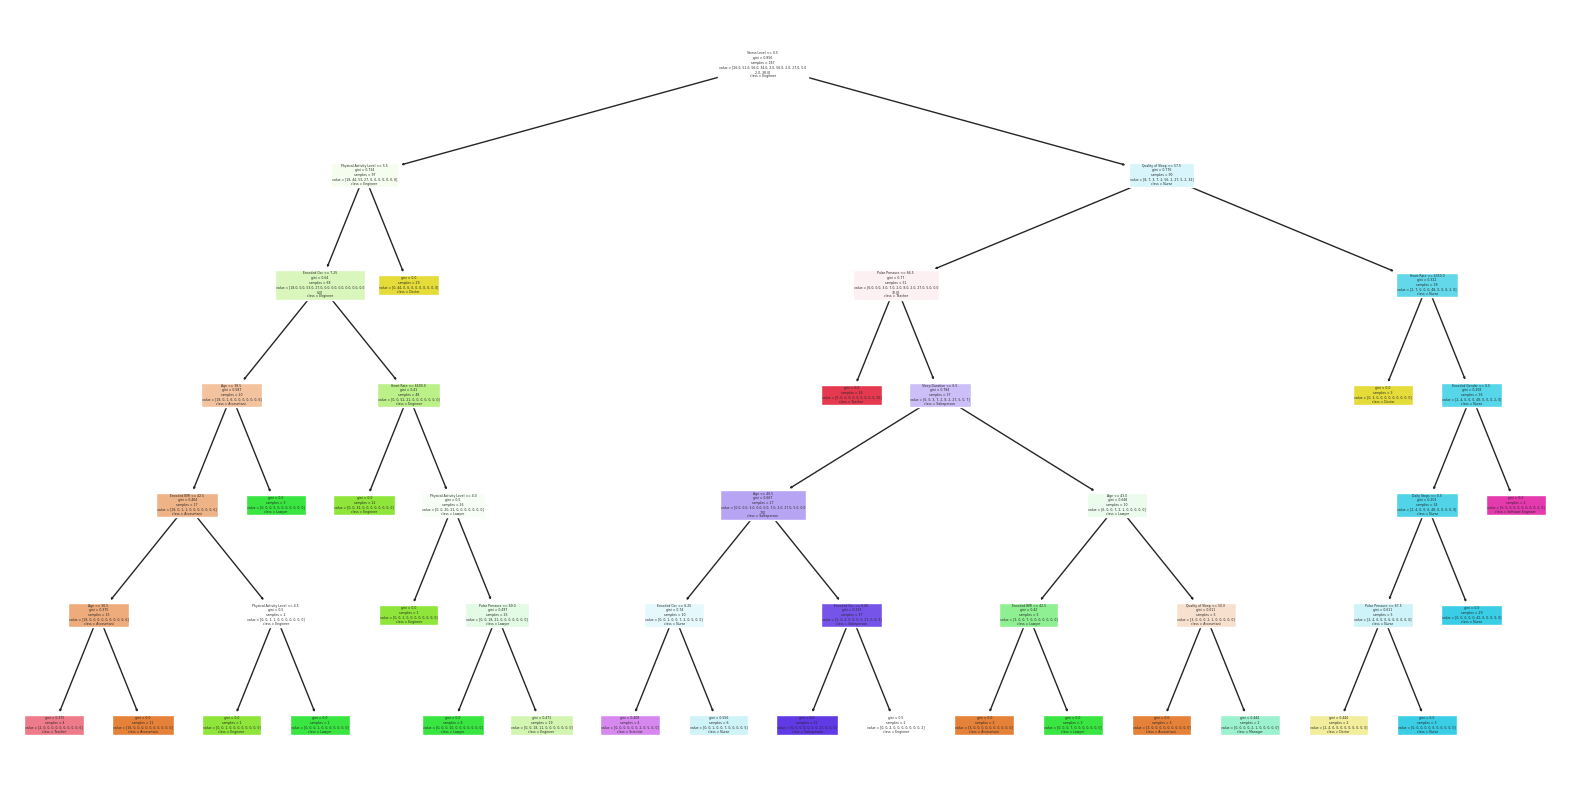

In [17]:
#decision tree 

from sklearn.tree import plot_tree

# extracting one of the decision trees from the Random Forest
one_tree = rf_model.estimators_[0]  

# plotting the selected decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(one_tree, filled=True, feature_names=X.columns, class_names=rf_model.classes_)  
plt.show()


The code block above visualizes a single decision tree from our random forest classifier. This allows for a deeper understanding of the desicion making process within the collection of trees. Zooming in on this diagram, we can see that features with high feature importance (from the  previous feature importance plot) such as age, quality of sleep, pulse pressure, stress level, and sleep duration are highly involved in this tree's decision making process.  

/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


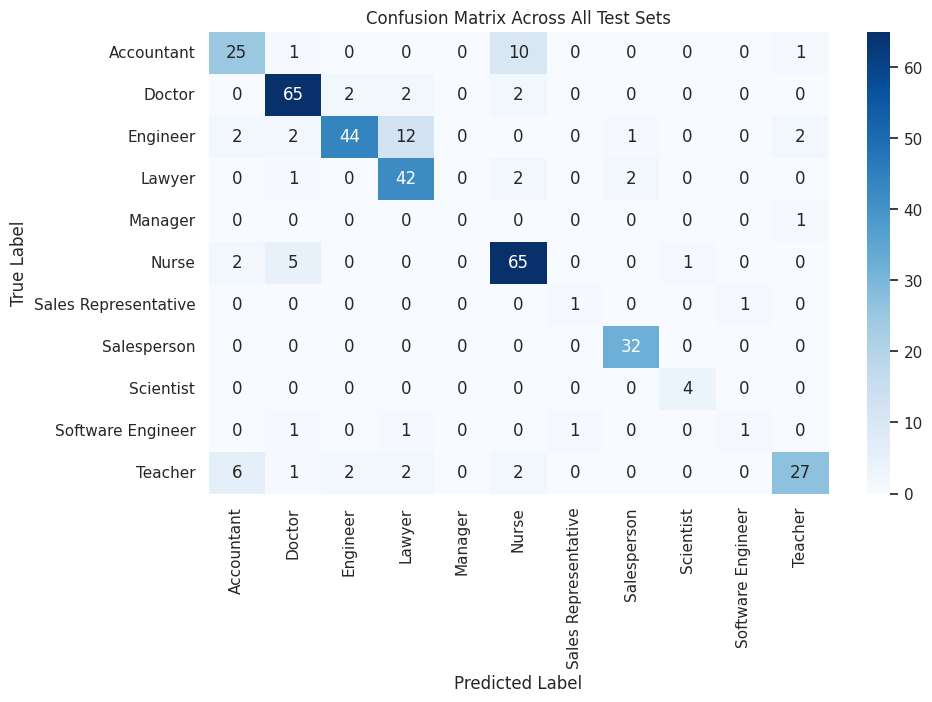

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming rf_model is your model and rf_X, rf_y are your features and labels for the entire dataset
rf_y_pred_cv = cross_val_predict(rf_model, rf_X, rf_y, cv=5)

# unique class labels
unique_labels_cv = np.unique(np.concatenate((rf_y, rf_y_pred_cv)))

# calculate confusion matrix across all folds
conf_mat_cv = confusion_matrix(rf_y, rf_y_pred_cv)

# plot heatmap with labeled axes for the confusion matrix across all test sets
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat_cv, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels_cv, yticklabels=unique_labels_cv)
plt.title('Confusion Matrix Across All Test Sets')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The code block above visualizes the confusion matrix across all folds of cross-validation for our random forest model. This allows us to assess the model's performance across different subsets of the data. The diagonal elements of the confusion matrix represent correct predictions, where the true occupation matches to the predicted occupation. The value of 25 in cell (1,1) means that there were 25 instances where an accountant was correctly predicted as an accountant, 65 in cell (2,2) means that there were 65 instances where a doctor was correctly predicted to be a doctor, and so on. The off-diagonal elements represent false predictions. For example, there were 12 instances (cell (4,3)) where an engineer was wrongly predicted to be a lawyer. 

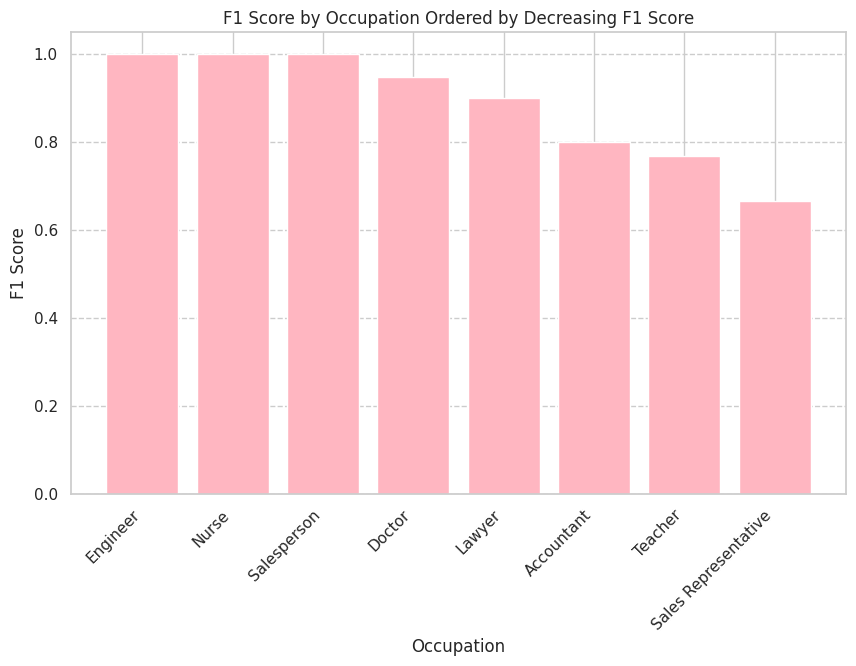

In [19]:
# f1 score bar plot ordered by decreasing F1 score 

from sklearn.metrics import f1_score

# Find f1 scores for each class and store them with their labels
rf_y_true = rf_y_test
f1_scores_with_labels = []
for class_label in np.unique(rf_y_true):
    if class_label != 'Software Engineer':  # Exclude 'Software Engineer'
        f1 = f1_score(rf_y_true == class_label, rf_y_pred == class_label)
        f1_scores_with_labels.append((class_label, f1))

# Sort the list of tuples by the F1 score in descending order
f1_scores_with_labels_sorted = sorted(f1_scores_with_labels, key=lambda x: x[1], reverse=True)

# Unpack the sorted tuples into two lists
labels_sorted, f1_scores_sorted = zip(*f1_scores_with_labels_sorted)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels_sorted, f1_scores_sorted, color='lightpink')
plt.xlabel('Occupation')
plt.ylabel('F1 Score')
plt.title('F1 Score by Occupation Ordered by Decreasing F1 Score')
plt.xticks(labels_sorted, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')  # Add grid lines for better readability
plt.show()

An F1 score is a measure that balances precision and recall, this provides a single measure of a model's accuracy. The model is doing a great job at predicting most occupations, specifically engineers, nurses, and sales people as these all have an F1 score of 1. The model is struggling to predict sales represntatives the most. These F1 scores may be influenced by the imbalance of persons in each occupation class.


Overall, the random forest model does a good job classifing a person's occupation based on their cardiovascular and lifestyle factors.

## Does Duration or Quality of sleep correlate with age?

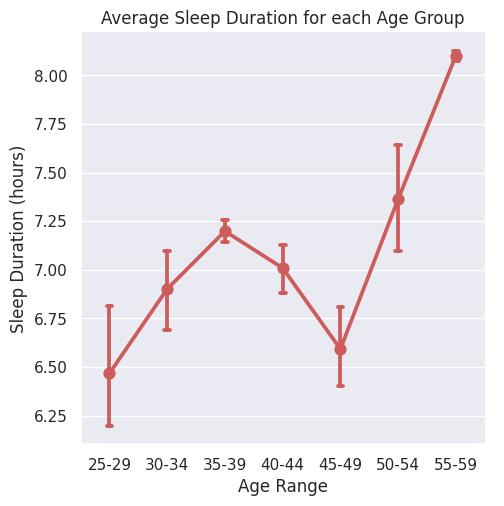

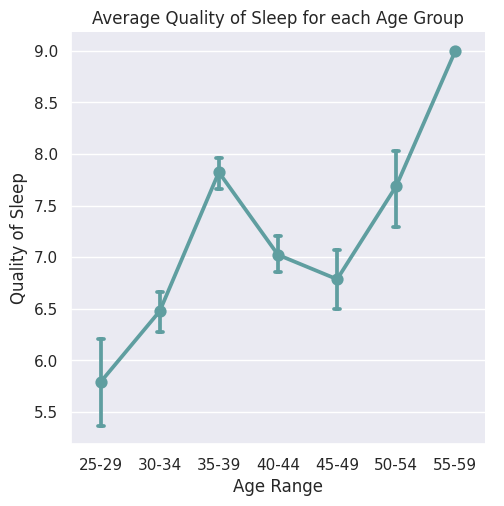

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sleep_data_age = sleep_data_original

# create a new column that contains the age range each participaint is in
for i in range(len(sleep_data_age)):
    if sleep_data_age.loc[i,'Age'] < 30:
        sleep_data_age.loc[i,'Age_Range'] = '25-29'
    elif sleep_data_age.loc[i,'Age'] < 35:
        sleep_data_age.loc[i,'Age_Range'] = '30-34'
    elif sleep_data_age.loc[i,'Age'] < 40:
        sleep_data_age.loc[i,'Age_Range'] = '35-39'
    elif sleep_data_age.loc[i,'Age'] < 45:
        sleep_data_age.loc[i,'Age_Range'] = '40-44'
    elif sleep_data_age.loc[i,'Age'] < 50:
        sleep_data_age.loc[i,'Age_Range'] = '45-49'
    elif sleep_data_age.loc[i,'Age'] < 55:
        sleep_data_age.loc[i,'Age_Range'] = '50-54'
    elif sleep_data_age.loc[i,'Age'] < 60:
        sleep_data_age.loc[i,'Age_Range'] = '55-59'

sns.set_style('darkgrid')
# create the point plot for the sleep duration
l = sns.catplot(kind='point',y=sleep_data_age['Sleep Duration'],x=sleep_data_age['Age_Range'],capsize=0.1,color='indianred')
l.set(title='Average Sleep Duration for each Age Group',xlabel = 'Age Range',ylabel='Sleep Duration (hours)')
# create the point plot for quality of sleep
g = sns.catplot(kind='point',y=sleep_data_age['Quality of Sleep'],x=sleep_data_age['Age_Range'],capsize=0.1,color='cadetblue')
g.set(title='Average Quality of Sleep for each Age Group',xlabel = 'Age Range',ylabel='Quality of Sleep')

In order to create these graphs, I sorted the age data into bins with 5 year ranges, from 25 to 59. Then I used point plots to create a good way to compare the mean of each of these age groups' quality of sleep and average sleep duration. Both graphs follow a similar trend, where the lowest quality of sleep and skeep duration is generally on the younger side while the highest is on the older side. Curiously, while these graphs follow similar shapes, despite 30-34 year olds having a higher duration of sleep on average than 45-49 year olds, they have on average a lower quality of sleep by almost 0.3. While these means are interesting, we can use other visualizations to see more about these distributions beyond the mean.

/tmp/ipykernel_677/3977048551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  k = sns.violinplot(y=sleep_data_age['Quality of Sleep'],x=sleep_data_age['Age_Range'],palette='viridis')


[Text(0.5, 1.0, 'Distribution of Sleep Quality across different age groups'),
 Text(0.5, 0, 'Age Range'),
 Text(0, 0.5, 'Quality of Sleep')]

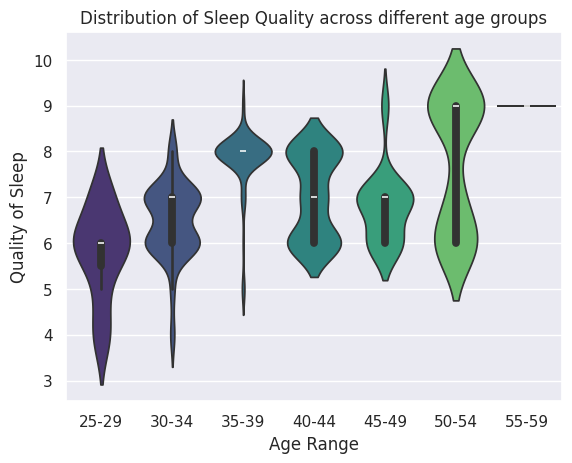

In [21]:
#create violin plot for quality of sleep across age groups
k = sns.violinplot(y=sleep_data_age['Quality of Sleep'],x=sleep_data_age['Age_Range'],palette='viridis')
k.set(title='Distribution of Sleep Quality across different age groups',xlabel='Age Range',ylabel='Quality of Sleep')


Looking at these plots, it seems that the 50-54 age range has the largest range in values, although 40-44 has the highest IQR. In addition, the 50-54 and 40-44 age ranges look almost bimodal. This implies that a different factor could be influencing the quality of sleep within each age group. For instance, being an accountant may make 40-44 year olds have lower quality of sleep. Another notable thing from this graph is that 55-59 year olds did not have any variance, they all put a 9 as their quality of sleep.

## todo: 
scatterplot of age range/age and quality of sleep (bc age was the most imporant factor in earlier regression)
if show pattern do regression (stat 222 stuff) maybe

In order to predict the age of someone, I decided to use the K nearest neighbors method. This is because it is reasonable to assume that people of similar ages have similar health and lifestyles. I decided not to use random forest models or gaussian naive bayes because it isn't reasonable to assume every single variable (for example step count and BMI) is independent. Finally, logistic regression would not be effective either not only because the independent variables could be correlated, but also because the response is not binary. 
For this k nearest neighbors analysis, I had to change the independent categorical variables gender, occupation, BMI. In addition I combined the pulses into the pulse pressure variable. I did this because the k nearest neighbors needs quantitative variables to predict boundaries between each prediction region. I decided to test k values from 1 to 20, and had 5 folds for the cross validation, as is standard for k nearest neighbors.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
import numpy as np

# preparing the variables for the model
X = sleep_data[['Encoded Gender', 'Encoded Occ', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Encoded BMI', 'Pulse Pressure', 'Heart Rate', 'Daily Steps', 'Disorder Present']]
label_encoder = LabelEncoder()

# Encoding the 'Age_Range' column to transform it from categorical to numerical
y = label_encoder.fit_transform(sleep_data_age['Age_Range'])

#splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generating an array of k values to try in the model
neighbors = np.linspace(1,20,20)
k = neighbors.astype(int)
param_grid = {'n_neighbors' : k}

# Initializing the KNeighborsClassifier
knn = KNeighborsClassifier()

# Setting up GridSearchCV with the KNN model, parameter grid, and 5 folds
knn_tuned = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')

# Fitting the model to the data
knn_tuned.fit(X_train,y_train)

# Extracting the best number of neighbors and the corresponding accuracy
print("Best n_neighbors:",knn_tuned.best_params_['n_neighbors']) 
score = knn_tuned.best_score_
print("Best score: {}".format(score))

Best n_neighbors: 1
Best score: 0.8598305084745762


As we can see, the k nearest neighbors model suggest 1 nearest neighbor. The low number of neighbors indicates a high level variance in predictions. This is because a lower number of neighbors means the predictive model is sensitive to very small changes in data values. In the real world, this means that each person in each age group holds different values for the independent variables, since it means there are no larger trends within age groups to create decision boundaries around. In essence, there may be a low correlation between health/sleep and age. The accuracy for this model is 86%, which is good, however we can look further into this accuracy, as well as questions raised by the low number of neighbors, using a confusion matrix.

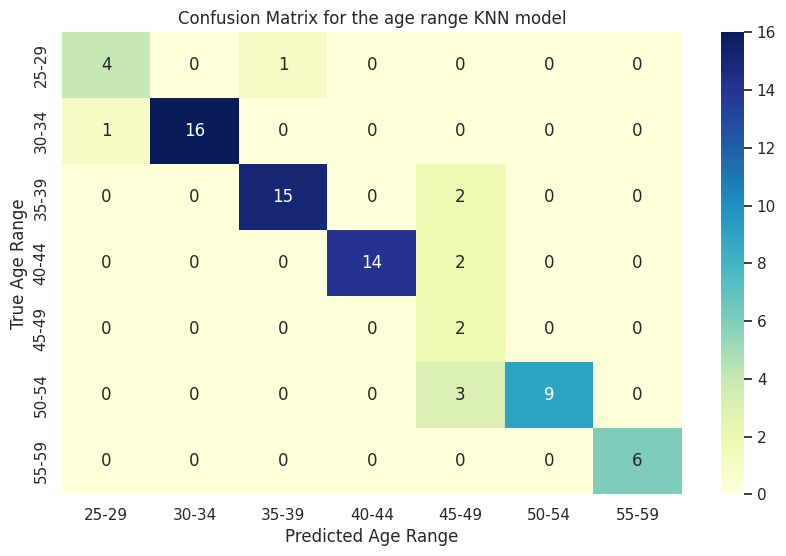

In [23]:
from sklearn.metrics import confusion_matrix
# get the predicted response from the testing data
y_pred = knn_tuned.predict(X_test)
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)
# ages list for the x and y labels
ages = ['25-29','30-34','35-39','40-44','45-49','50-54','55-59',]
#making the heatmap
plt.figure(figsize=(10, 6))
i = sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=ages,yticklabels=ages)
i.set(ylabel="True Age Range", xlabel="Predicted Age Range", title="Confusion Matrix for the age range KNN model")
plt.show()

This confusion matrix shows the difference between predicted and true values in the test set for the age range model. The diagonal is the correct predictions, for instance 30-34 was correctly predicted 16 times. From this confusion matrix we can see that 45-49 was predicted much more by the predictive model than in the test set. This could be because of a small sample size for 45-49 year olds in original data. In addition, the fact that predicted ages from 35 to 54 to all be 45-59 suggest that these age ranges hold similarities in terms of health and sleep attributes. This would imply that there may be a low correlation between age and health/sleep in this age range. However, in contrast the model rarely predicted incorrectly for ages from 25 to 34 or 55-59. This suggests that middle aged people specifically may share quite similar health and sleep conditions, however outside of that age range, one's age is tied to health/sleep. This would explain the errors in the confusion matrix, low number of neighbors in the knn model while also accounting for the large feature importance age had in the previous predictive model for quality of sleep. 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.94      0.97        17
           2       0.94      0.88      0.91        17
           3       1.00      0.88      0.93        16
           4       0.22      1.00      0.36         2
           5       1.00      0.75      0.86        12
           6       1.00      1.00      1.00         6

    accuracy                           0.88        75
   macro avg       0.85      0.89      0.83        75
weighted avg       0.95      0.88      0.91        75



As we can see in this classification report, the fourth response group (45-49) has the lowest f score of 0.36, which is significantly lower than any other response group. Notably, both those on the youngest end (response groups 1-2) and the oldest end (5-6) had incredibly high f scores. This aligns with what we see in the confusion matrix, supporting our idea that middle aged folk specifically share similar health conditions while those on the extremes of the age range have health traits that correlate to their age in specific. It should also be noted that the 45-49 age group has significantly fewer data points in the test group, which could also explain the high variability in predictions.